In [1]:
import sys
sys.path.append("/home/ly/workspace/mmsa")
seed = 1918
import numpy as np
import torch
from torch import nn
from torch import optim

np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
from models.lymodel4 import *
from utils.train import *
from typing import *
from collections import Counter
from utils.load_yelp import *
from utils.dataset import *
from utils.train import *
from utils.train import *

In [2]:
config

{'task': 'CLS',
 'embedding_dim': 100,
 'embedding': None,
 'freeze_embedding': True,
 'text_hidden_size': 100,
 'text_layers': 1,
 'max_tokens': 512,
 'uniform_bound': 0.1,
 'img_input_size': 2048,
 'img_encoder_layers': 1,
 'attention_nhead': 4,
 'fusion_hidden_size': 200,
 'funsion_layers': 1,
 'dropout': 0.1,
 'output_size': 5,
 'bias_init': 1.0}

In [3]:
batch_size = 64
workers = 4
train_set, valid_set, test_set= load_glove_data(config)
train_loader, valid_loader, test_loader = get_loader(batch_size, workers, get_collate_fn(config), train_set, valid_set, test_set)
model = Model(config).cuda()
loss = nn.CrossEntropyLoss()
get_parameter_number(model), loss

/home/ly/miniconda3/envs/torch1.6.0/lib/python3.7/site-packages/torch/nn/modules/rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


({'Total': 5620005, 'Trainable': 1336605}, CrossEntropyLoss())

In [4]:
%%time
y_true, y_pred, _loss = predict(model, valid_loader, loss)
evalute(y_true, y_pred), Counter(y_pred)

CPU times: user 3.72 s, sys: 2.13 s, total: 5.85 s
Wall time: 9.74 s


((0.18645598194130925, 0.0938545441633638), Counter({4: 3686, 2: 730, 0: 14}))

In [5]:
%%time
lr = 1e-3
epoches = 20
stopping_step = 10
optimizer = get_regal_optimizer(model, optim.AdamW, lr)

viz = get_Visdom()
_interval = 5
batch_loss_drawer = VisdomScalar(viz, f"batch_loss interval:{_interval}")
epoch_loss_drawer = VisdomScalar(viz, f"Train and valid loss", 2)
acc_drawer = VisdomScalar(viz, "Train and valid accuracy", 2)

batch_loss = []
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []

res, model = train_visdom(model, optimizer, loss, viz, train_loader,
                          valid_loader, epoches, batch_loss, batch_loss_drawer,
                          train_loss, valid_loss, epoch_loss_drawer,
                          train_acc, valid_acc, acc_drawer,
                         _interval=_interval, )

Setting up a new session...
No 1 epoch: 554it [01:35,  5.81it/s]


No 1 epoch: train_loss:1.2985864456121332 train_acc:0.4098462406545352 valid_loss:1.0732680388820899 valid_acc:0.5275395033860045


No 2 epoch: 554it [01:35,  5.83it/s]


No 2 epoch: train_loss:1.08672790431492 train_acc:0.5164056989702356 valid_loss:1.0386399391273344 valid_acc:0.5424379232505643


No 3 epoch: 554it [01:35,  5.78it/s]


No 3 epoch: train_loss:1.0248032082201715 train_acc:0.5430102976442376 valid_loss:0.9522782459215978 valid_acc:0.5812641083521445


No 4 epoch: 554it [01:36,  5.74it/s]


No 4 epoch: train_loss:0.9803691817668517 train_acc:0.5630977570884469 valid_loss:0.9421938678480971 valid_acc:0.5857787810383747


No 5 epoch: 554it [01:36,  5.74it/s]


No 5 epoch: train_loss:0.9422917612030469 train_acc:0.5821131330229934 valid_loss:0.9536160842021486 valid_acc:0.5805869074492099


No 6 epoch: 554it [01:37,  5.66it/s]


No 6 epoch: train_loss:0.8985706284278572 train_acc:0.6008745944420933 valid_loss:0.9362854513034864 valid_acc:0.5923250564334086


No 7 epoch: 554it [01:37,  5.67it/s]


No 7 epoch: train_loss:0.8617955010908248 train_acc:0.6209902666102413 valid_loss:0.9348837503999404 valid_acc:0.5878103837471783


No 8 epoch: 554it [01:38,  5.62it/s]


No 8 epoch: train_loss:0.8117255634406605 train_acc:0.6476512907321201 valid_loss:0.9360952972020307 valid_acc:0.5927765237020316


No 9 epoch: 554it [01:37,  5.69it/s]


No 9 epoch: train_loss:0.7590005006738367 train_acc:0.6741148257864297 valid_loss:0.9686548016948571 valid_acc:0.5801354401805869


No 10 epoch: 554it [01:37,  5.65it/s]


No 10 epoch: train_loss:0.6870224258932984 train_acc:0.7101706869798279 valid_loss:1.0170700670095922 valid_acc:0.5749435665914221


No 11 epoch: 554it [01:38,  5.65it/s]


No 11 epoch: train_loss:0.6002099382556162 train_acc:0.7531386655381577 valid_loss:1.0939426485087478 valid_acc:0.5851015801354402


No 12 epoch: 554it [01:39,  5.55it/s]


No 12 epoch: train_loss:0.5100013640455272 train_acc:0.7955423896177176 valid_loss:1.2379394849320835 valid_acc:0.5677200902934537


No 13 epoch: 554it [01:39,  5.57it/s]


No 13 epoch: train_loss:0.4103185089960608 train_acc:0.8374664973903231 valid_loss:1.4291323928208706 valid_acc:0.5593679458239278
CPU times: user 15min 36s, sys: 4min 56s, total: 20min 33s
Wall time: 23min 17s


In [6]:
res

{'max_acc': 0.5927765237020316,
 'max_acc_epoch': 8,
 'max_train_acc': 0.6476512907321201,
 'max_acc_train_loss': 0.8117255634406605,
 'max_acc_valid_loss': 0.9360952972020307,
 'last_acc': 0.5593679458239278,
 'last_train_acc': 0.8374664973903231,
 'last_epoch': 13,
 'last_train_loss': 0.4103185089960608,
 'last_valid_loss': 1.4291323928208706}

In [7]:
eval_model(model, test_loader, loss)

/home/ly/miniconda3/envs/torch1.6.0/lib/python3.7/site-packages/torch/nn/modules/rnn.py:738: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629427478/work/aten/src/ATen/native/cudnn/RNN.cpp:1234.)
  self.num_layers, self.dropout, self.training, self.bidirectional)


((0.5778781038374717, 0.5784676462157294), 0.9254237027792576)

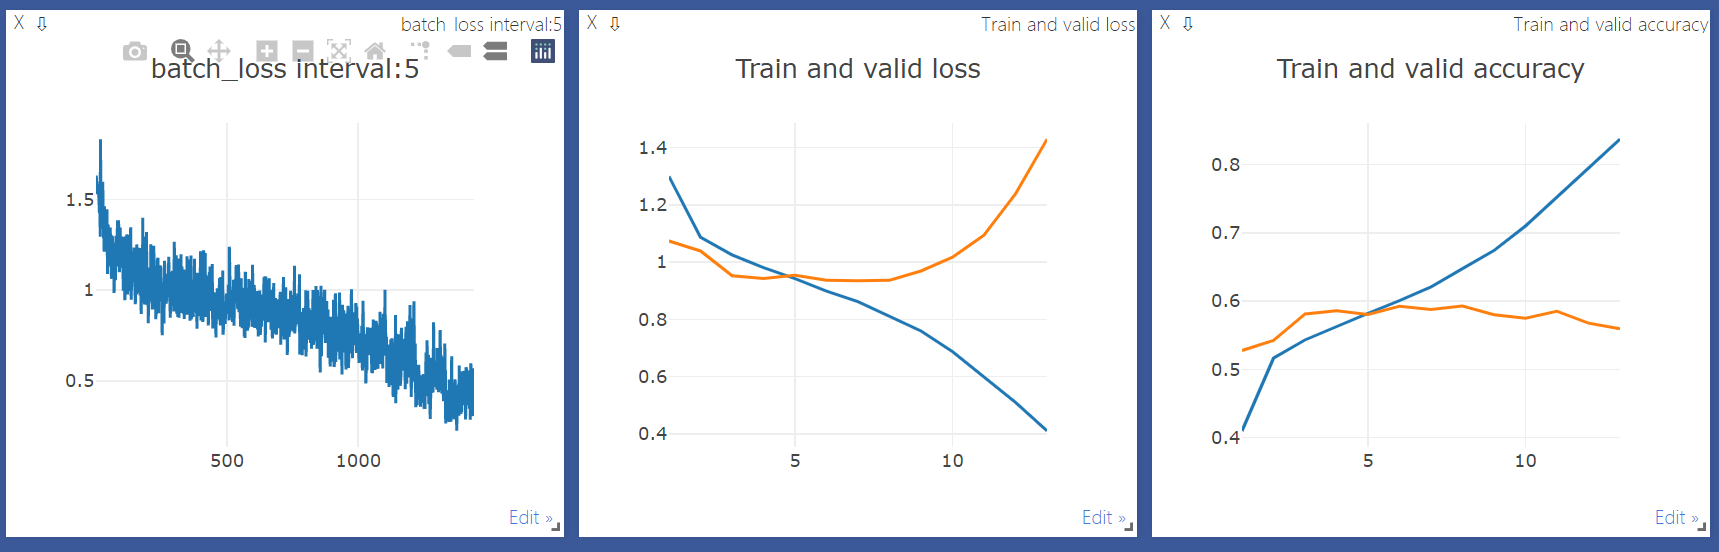